In [93]:
# -*- coding: utf-8 -*-
#/Users/nikhilmehta1/documents/GitHub/covid-data-challenge/raw_data/turnstile_data
"""
Created on Tue Apr  21 2020

@author: nikhilmehta1
"""

import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import dateutil
from dateutil.parser import parse
import pylab
from matplotlib import pyplot as plt
from IPython import get_ipython
import datetime
import matplotlib.dates
import math
from tqdm import tqdm_notebook
%matplotlib inline
plt.style.use('dark_background')
plt.figure(figsize = (10,10))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
import numpy as np
import pandas as pd

turnstile_use_daily = pd.read_csv("nyc-transit-data-turnstile_daily_counts_2020.csv")

#raw data files
turnstile_200201 = pd.read_csv("turnstile_200201.txt")
turnstile_200208 = pd.read_csv("turnstile_200208.txt")
turnstile_200215 = pd.read_csv("turnstile_200215.txt")
turnstile_200222 = pd.read_csv("turnstile_200222.txt")
turnstile_200229 = pd.read_csv("turnstile_200229.txt")
turnstile_200307 = pd.read_csv("turnstile_200307.txt")
turnstile_200314 = pd.read_csv("turnstile_200314.txt")
turnstile_200321 = pd.read_csv("turnstile_200321.txt")
turnstile_200328 = pd.read_csv("turnstile_200328.txt")

<Figure size 720x720 with 0 Axes>

In [94]:
#generate coords
station_coords = turnstile_use_daily.drop(['daytime_routes', 'division', 'line', 'borough', 'structure', 'complex_id', 'date', 'entries', 'exits'], axis = 1)
station_coords = station_coords.drop_duplicates()
station_coords = station_coords.reset_index()
station_coords = station_coords.drop('index', axis = 1)
station_coords

,stop_name,gtfs_longitude,gtfs_latitude
0,Astoria - Ditmars Blvd,-73.912034,40.775036
1,Hewes St,-73.953431,40.706870
2,Marcy Av,-73.957757,40.708359
3,Bowery,-73.993915,40.720280
4,Broad St,-74.011056,40.706476
5,Middle Village - Metropolitan Av,-73.889601,40.711396
6,Fresh Pond Rd,-73.895877,40.706186
7,Forest Av,-73.903077,40.704423
8,Seneca Av,-73.907740,40.702762
9,Knickerbocker Av,-73.919711,40.698664


In [95]:
station_coords.to_csv('station_coords.csv')

In [96]:
turnstile_total = pd.concat([turnstile_200201, turnstile_200208, turnstile_200215, turnstile_200222, turnstile_200229, turnstile_200307, turnstile_200314, turnstile_200321, turnstile_200328], axis = 0)
turnstile_total

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,03:00:00,REGULAR,7356095,2493703
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,07:00:00,REGULAR,7356105,2493714
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,11:00:00,REGULAR,7356170,2493761
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,15:00:00,REGULAR,7356333,2493812
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,19:00:00,REGULAR,7356581,2493862
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/25/2020,23:00:00,REGULAR,7356730,2493891
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,03:00:00,REGULAR,7356770,2493906
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,07:00:00,REGULAR,7356776,2493910
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,11:00:00,REGULAR,7356826,2493953
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/26/2020,15:00:00,REGULAR,7356974,2493994


In [97]:
#sorting turnstile data by station, turnstile unit, SCP, date, and then time
turnstile_total = turnstile_total.sort_values(by = ["STATION", "UNIT", "SCP", "DATE", "TIME"])
turnstile_total

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
31489,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,03:00:00,REGULAR,15389653,17211116
31490,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,07:00:00,REGULAR,15389714,17211293
31491,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,11:00:00,REGULAR,15389894,17211844
31492,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,15:00:00,REGULAR,15390340,17212690
31493,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,19:00:00,REGULAR,15390909,17213713
31494,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,23:00:00,REGULAR,15391443,17214587
31495,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,03:00:00,REGULAR,15391733,17214981
31496,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,07:00:00,REGULAR,15391776,17215124
31497,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,11:00:00,REGULAR,15391929,17215519
31498,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,15:00:00,REGULAR,15392382,17216214


In [101]:
stations = list(turnstile_total["STATION"].unique())
t_units = list(turnstile_total[turnstile_total["STATION"] == '103 ST']["UNIT"].unique())
station_index = turnstile_total["STATION"] == "103 ST"
tunit_index = turnstile_total["UNIT"] == 'R314'

go = True;

for station in tqdm_notebook(stations):
    t_units = list(turnstile_total[turnstile_total["STATION"] == station]["UNIT"].unique())
    turnstile_station = turnstile_total[turnstile_total["STATION"] == station]
    for t_unit in t_units:
        turnstile_unit = turnstile_station[turnstile_station["UNIT"] == t_unit]
        t_scps = list(turnstile_unit["SCP"].unique())
        for t_scp in t_scps:
            station_index = turnstile_total["STATION"] == station
            tunit_index = turnstile_total["UNIT"] == t_unit
            tscp_index = turnstile_total["SCP"] == t_scp
            stationunitscp_index = station_index * tunit_index * tscp_index
            print(turnstile_total[stationunitscp_index]["ENTRIES"].diff())
#stationunit_index = station_index * tunit_index
#turnstile_total[stationunit_index]
turnstile_total

/Users/nikhilmehta1/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


31489       NaN
31490      61.0
31491     180.0
31492     446.0
31493     569.0
31494     534.0
31495     290.0
31496      43.0
31497     153.0
31498     453.0
31499     524.0
31500     328.0
31501     104.0
31502      96.0
31503    1169.0
31504     624.0
31505    1003.0
31506     427.0
31507     126.0
31508     121.0
31509    1432.0
31510     636.0
31511    1100.0
31512     489.0
31513     148.0
31514     107.0
31515    1465.0
31516     731.0
31517    1207.0
31518     530.0
          ...  
32569       0.0
32570       0.0
32571       0.0
32572       0.0
32573       0.0
32574       0.0
32575       0.0
32576       0.0
32577       0.0
32578       0.0
32579       0.0
32580       0.0
32581       0.0
32582       0.0
32583       0.0
32584       0.0
32585       0.0
32586       0.0
32587       0.0
32588       0.0
32589       0.0
32590       0.0
32591       0.0
32592       0.0
32593       0.0
32594       0.0
32595       0.0
32596       0.0
31511       0.0
31512       0.0
Name: ENTRIES, Length: 2

31827      NaN
31828      0.0
31829      0.0
31830      0.0
31831      0.0
31832      0.0
31833      0.0
31834      0.0
31835      0.0
31836      0.0
31837      0.0
31838      0.0
31839      0.0
31840      0.0
31841      0.0
31842      0.0
31843      0.0
31844      0.0
31845      0.0
31846      0.0
31847      0.0
31848      0.0
31849      0.0
31850      0.0
31851      0.0
31852      0.0
31853      0.0
31854      0.0
31855      0.0
31856      0.0
         ...  
32020      0.0
32021      0.0
32022      4.0
32023     16.0
32024     80.0
32025    102.0
32026      8.0
32027      0.0
32028     13.0
32029     14.0
32030     50.0
32031     87.0
32032     12.0
32033      1.0
32034      9.0
32035     18.0
32036     57.0
32037     99.0
32038      9.0
32039      0.0
32040     10.0
32041     25.0
32042     48.0
32043     68.0
32044      4.0
32045      0.0
32046      7.0
32047     16.0
32048     56.0
32049     60.0
Name: ENTRIES, Length: 381, dtype: float64
31859      NaN
31860      0.0
31861      3

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
31489,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,03:00:00,REGULAR,15389653,17211116
31490,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,07:00:00,REGULAR,15389714,17211293
31491,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,11:00:00,REGULAR,15389894,17211844
31492,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,15:00:00,REGULAR,15390340,17212690
31493,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,19:00:00,REGULAR,15390909,17213713
31494,H007,R248,00-00-00,1 AV,L,BMT,01/25/2020,23:00:00,REGULAR,15391443,17214587
31495,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,03:00:00,REGULAR,15391733,17214981
31496,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,07:00:00,REGULAR,15391776,17215124
31497,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,11:00:00,REGULAR,15391929,17215519
31498,H007,R248,00-00-00,1 AV,L,BMT,01/26/2020,15:00:00,REGULAR,15392382,17216214


In [19]:
turnstile_use['date'] = pd.to_datetime(turnstile_use['date'])
type(turnstile_use['date'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
turnstile_use_daily[turnstile_use_daily["stop_name"] == "Astoria - Ditmars Blvd"]

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,7024,7060
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15234,12171
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15687,14586
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9324,10309
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7659,8371
5,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-06,16658,12689
6,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-07,17308,13896
7,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-08,17592,15980
8,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-09,17510,14937
9,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-10,17208,15684


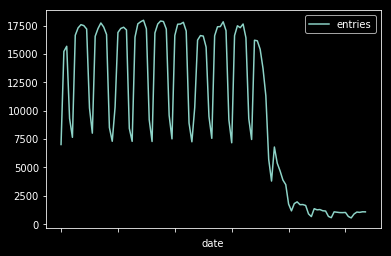

In [20]:
turnstile_use_daily[turnstile_use_daily["stop_name"] == "Astoria - Ditmars Blvd"].plot('date', 'entries')


In [21]:
type(turnstile_use_daily['date'][2])

str